# **Load data  from Colab**






In [1]:
# Install kaggle CLI
!pip install kaggle

# Set Kaggle username and API key directly (replace with your credentials)
kaggle_username = "hatemhenchir"
kaggle_api_key = "af31ca268d4e6d14a19ed3b821e7aaf9"

# Set Kaggle API credentials directly
import json
import os

kaggle_json_path = '/content/kaggle.json'
credentials = {"username": kaggle_username, "key": kaggle_api_key}

with open(kaggle_json_path, 'w') as kaggle_json:
    json.dump(credentials, kaggle_json)

# Kaggle config
!mkdir -p ~/.kaggle
!mv {kaggle_json_path} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using the Kaggle dataset link
!kaggle datasets download -d trainingdatapro/gender-detection-and-classification-image-dataset

# Unzip the dataset
!unzip -q /content/gender-detection-and-classification-image-dataset.zip -d /content/gender-detection-and-classification-image-dataset

 99% 597M/606M [00:07<00:00, 84.0MB/s]
100% 606M/606M [00:07<00:00, 88.2MB/s]


**Import necessary libraries**

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Constants
train_data_dir = './gender-detection-and-classification-image-dataset/train'
test_data_dir = './gender-detection-and-classification-image-dataset/test'
img_size = (224, 224)
batch_size = 16
num_epochs = 100

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No Data Augmentation for Testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


# **MobileNetV2**

In [4]:
from tensorflow.keras.applications import MobileNetV2


# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model on the test set
eval_result = model.evaluate(test_generator)
print("Test Accuracy:", eval_result[1])

# Predictions on the test set
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print precision, recall, and F1-score
print("Classification Report:")
print(classification_report(test_generator.classes, y_pred))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_generator.classes, y_pred))

# Save the model
model.save('/content/mobileNet_gender_classification.keras')



9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/100
14/14 [==============================] - 38s 2s/step - loss: 0.7378 - accuracy: 0.5318 - val_loss: 0.6475 - val_accuracy: 0.6500
Epoch 2/100
14/14 [==============================] - 24s 2s/step - loss: 0.6023 - accuracy: 0.6773 - val_loss: 0.5795 - val_accuracy: 0.7500
Epoch 3/100
14/14 [==============================] - 24s 2s/step - loss: 0.5499 - accuracy: 0.7318 - val_loss: 0.5415 - val_accuracy: 0.8000
Epoch 4/100
14/14 [==============================] - 24s 2s/step - loss: 0.4838 - accuracy: 0.7955 - val_loss: 0.5079 - val_accuracy: 0.8000
Epoch 5/100
14/14 [==============================] - 24s 2s/step - loss: 0.4461 - accuracy: 0.8182 - val_loss: 0.4905 - val_accuracy: 0.7875
Epoch 6/100
14/14 [==============================] - 23s 2s/step - loss: 0.4124 - accuracy: 0.8364 - val_loss: 0.4771 - val_accuracy: 0.8500
Epoch 7/100
14/14 [==============================] - 24s 2s/step - loss: 0.3960 - accuracy:

# **EfficientNetB0**

In [5]:
from tensorflow.keras.applications import EfficientNetB0


# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator,callbacks=[early_stopping])

# Evaluate the model on the test set
eval_result = model.evaluate(test_generator)
print("Test Accuracy:", eval_result[1])

# Predictions on the test set
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print precision, recall, and F1-score
print("Classification Report:")
print(classification_report(test_generator.classes, y_pred,zero_division=1))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_generator.classes, y_pred))

# Save the model
model.save('/content/gender_classification_efficientnet.keras')


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/100
14/14 [==============================] - 35s 2s/step - loss: 0.6951 - accuracy: 0.5409 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/100
14/14 [==============================] - 24s 2s/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
14/14 [==============================] - 24s 2s/step - loss: 0.7073 - accuracy: 0.4864 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
14/14 [==============================] - 23s 2s/step - loss: 0.7011 - accuracy: 0.4682 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
14/14 [==============================] - 24s 2s/step - loss: 0.6969 - accuracy: 0.4545 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 6/100
14/14 [==============================] - 23s 2s/step - loss: 0.6965 - accuracy: 0.4364 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
14/14 [==============================] - 25s 2s/step - loss: 0.6954 - accurac

# **Xception**

In [6]:
# Import necessary libraries
from tensorflow.keras.applications import Xception


# Load pre-trained Xception model
base_model = Xception(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model on the test set
eval_result = model.evaluate(test_generator)
print("Test Accuracy:", eval_result[1])

# Predictions on the test set
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print precision, recall, and F1-score
print("Classification Report:")
print(classification_report(test_generator.classes, y_pred,zero_division=1))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_generator.classes, y_pred))

# Save the model
model.save('/content/gender_classification_Xception.keras')


83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/100
14/14 [==============================] - 32s 2s/step - loss: 4.6277 - accuracy: 0.6955 - val_loss: 3.5607 - val_accuracy: 0.7875
Epoch 2/100
14/14 [==============================] - 27s 2s/step - loss: 4.6466 - accuracy: 0.7682 - val_loss: 3.8327 - val_accuracy: 0.7750
Epoch 3/100
14/14 [==============================] - 24s 2s/step - loss: 1.6864 - accuracy: 0.8409 - val_loss: 2.0516 - val_accuracy: 0.7625
Epoch 4/100
14/14 [==============================] - 27s 2s/step - loss: 2.3993 - accuracy: 0.8409 - val_loss: 3.6727 - val_accuracy: 0.7250
Epoch 5/100
14/14 [==============================] - 26s 2s/step - loss: 1.5336 - accuracy: 0.8545 - val_loss: 2.5180 - val_accuracy: 0.7750
Epoch 6/100
14/14 [==============================] - 24s 2s/step - loss: 1.4169 - accuracy: 0.8455 - val_loss: 1.9064 - val_accuracy: 0.7375
Epoch 7/100
14/14 [==============================] - 23s 2s/step - loss: 0.4834 - accurac

# **Test the MobileNetV2 modal**

1/1 [==============================] - 1s 1s/step
Prediction: Woman


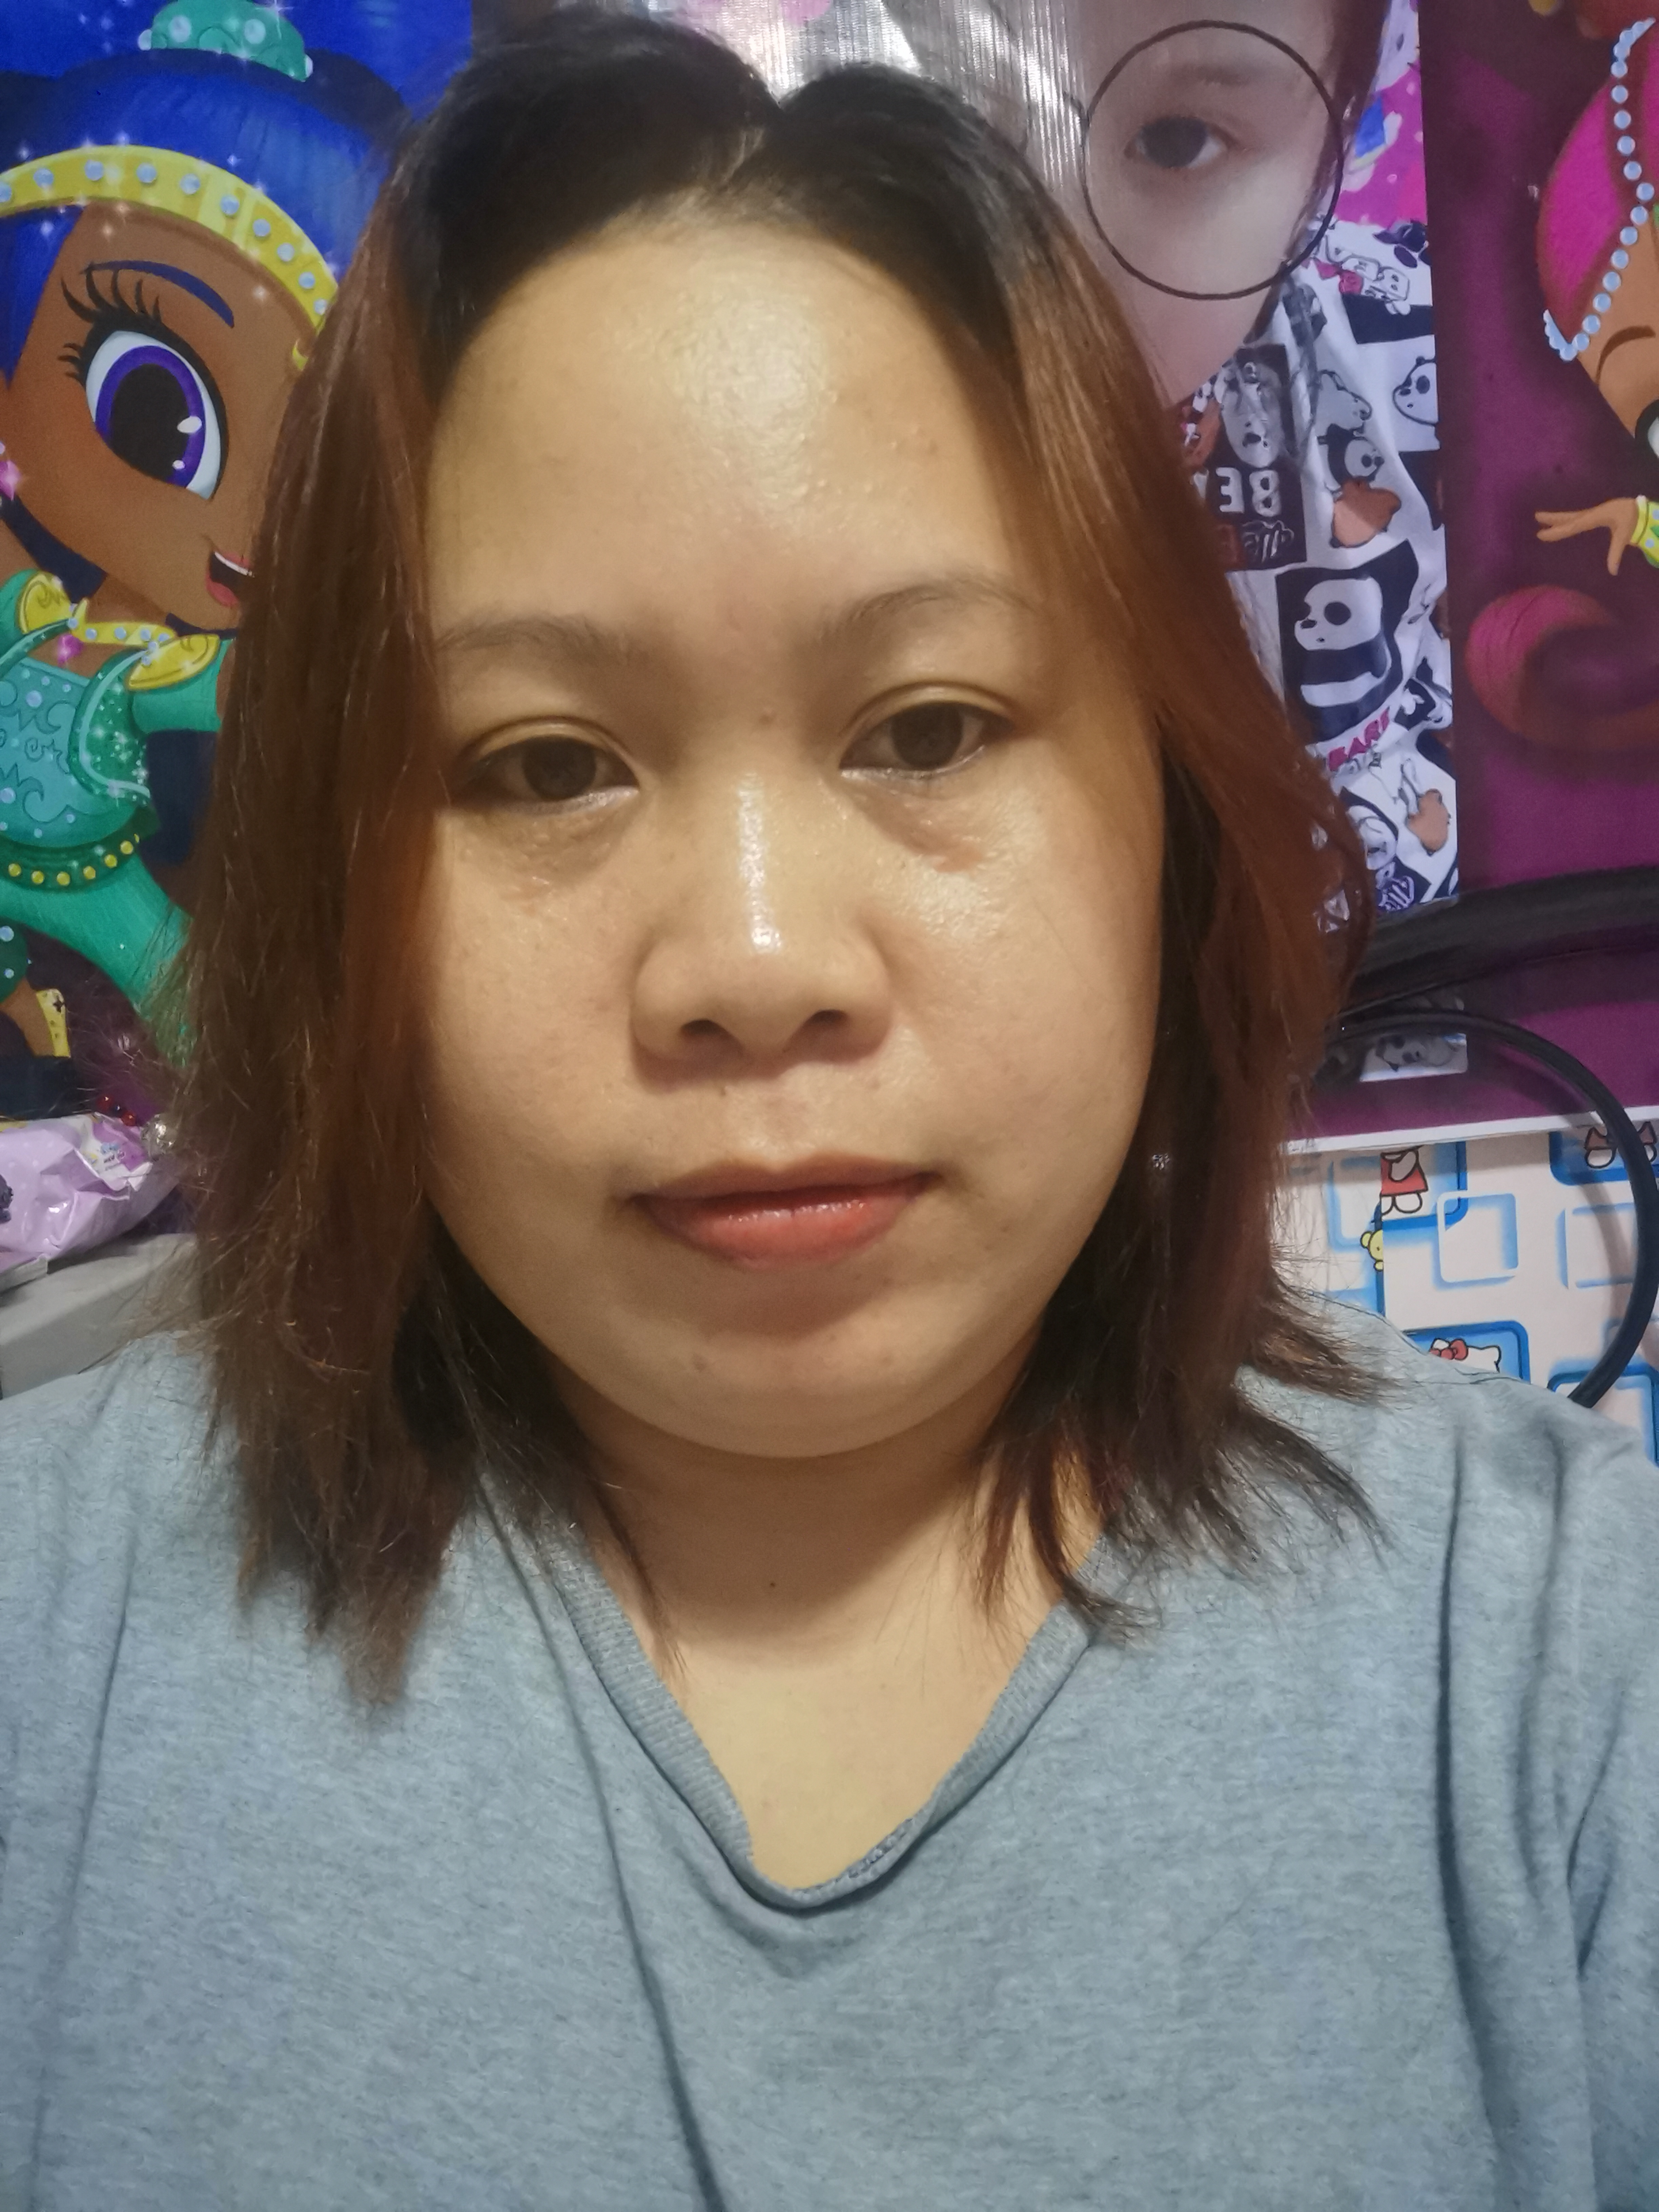

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Load the uploaded image
uploaded_image_path = '/content/gender-detection-and-classification-image-dataset/test/women/116.jpg'  # Update with the actual path
img = image.load_img(uploaded_image_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values


# Load the saved model
loaded_model = load_model('/content/mobileNet_gender_classification.keras')

# Make a prediction
prediction = loaded_model.predict(img_array)

# Interpret the prediction
if prediction[0, 0] >= 0.5:
    print("Prediction: Woman")
else:
    print("Prediction: Man")

# Display the image
from IPython.display import display, Image
display(Image(filename=uploaded_image_path))
